In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def procee_log(log:str):
    metric_dict = {}
    metric_arr = log.split("|")
    for item in metric_arr:
        metrics = item.strip().split(' ')
        metric_dict[metrics[-2][:-1]] = eval(metrics[-1])
    return metric_dict

In [10]:
train_data_list = []
valid_data_list = []

with open('./train.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        if line.startswith("Train") and "duration" not in line:
            train_data_list.append(procee_log(line))
        elif line.startswith("Valid") and "duration" not in line:
            valid_data_list.append(procee_log(line))

In [4]:
def plot_result_line(metric_list:list, metric):
    metric_arr = list(map(lambda x: x[metric], metric_list))
    print("max: ", max(metric_arr), "min: ", min(metric_arr))
    x = range(1, len(metric_arr) + 1)
    plt.plot(x, metric_arr)
    plt.show()

max:  0.7076792125921306 min:  0.4331489466774191


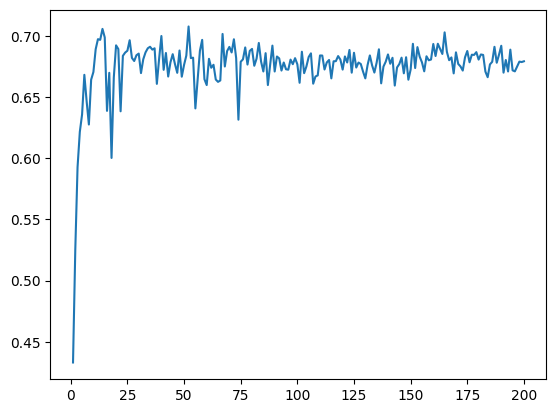

In [11]:
plot_result_line(valid_data_list, "Dice")

max:  0.7775517834557427 min:  0.218479186296463


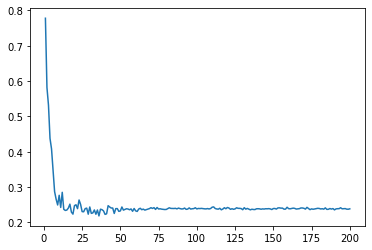

In [21]:
plot_result_line(valid_data_list[:200], "loss")

In [12]:
def get_result_from_file(filename):
    d1 = {}
    with open(filename, 'r', encoding="utf-8") as f:
        for line in f.readlines():
            line = line.strip()
            data_info = line.split(" | ")
            for item in data_info:
                # print(item)
                item = item.split(": ")
                if item[0] not in d1.keys():
                    d1[item[0]] = []
                d1[item[0]].append(float(item[1]))
    return d1

In [13]:
d1 = get_result_from_file("train.txt")
d2 = get_result_from_file("train1.txt")

In [1]:
import cv2

In [17]:
cnt = 0
for i in range(111):
    if d1["Dice"][i] > d2["Dice"][i]:
        print(i, d1["Dice"][i] - d2["Dice"][i])
        cnt += 1
print(cnt)


1 0.1415343902059345
12 0.0011883106806007682
14 0.021578691116562854
18 0.015384376534008481
19 0.00021119418109083465
20 0.10299623047717965
22 0.03439541405485913
27 0.012224196227601847
32 0.010090474863384657
39 0.011197528693974945
40 0.2917771883289125
42 0.6575092880851098
43 0.6082075795522446
44 0.6522135003517873
45 0.4794553989560447
46 0.2858410534233402
47 0.06572266366854562
48 0.05883058435391941
49 0.1442078323434256
50 0.008554572271386451
62 0.013376751519063368
63 0.026466191425073338
65 0.013769321753129282
66 0.006144453926687943
68 0.007353033421193977
78 0.010759337938862856
79 0.0038814985864450424
80 0.01949509462950294
81 0.07597809633357788
93 0.0108663053561866
97 0.02086351782092155
101 0.09699503302884083
102 0.14295588194207187
103 0.01623748541610681
109 0.05871888289122573
110 0.1700162928886333
36
